# 1. Data Loading and Exploration

In [1]:
import os
import shutil
# Defining the source folders
source_folders = {
    "emails": "/content/drive/MyDrive/rvl cdip dataset/email",
    "resumes": "/content/drive/MyDrive/rvl cdip dataset/resume",
    "scientific_publications": "/content/drive/MyDrive/rvl cdip dataset/scientific_publication",
    "resumes_1": "/content/drive/MyDrive/resume-no-resume-dataset/resumes",
    "no_resumes": "/content/drive/MyDrive/resume-no-resume-dataset/non-resumes"
}
# Define the destination folder
destination_folder = "resume_dataset"
# Create the new main folder and subfolders 'resume' and 'not_resume'
resume_folder = os.path.join(destination_folder, "resume")
not_resume_folder = os.path.join(destination_folder, "not_resume")
# Create directories (new folder and subfolders) if they don't exist
os.makedirs(resume_folder, exist_ok=True)
os.makedirs(not_resume_folder, exist_ok=True)

In [2]:
# Copy files to their respective folders
for folder_name, folder_path in source_folders.items():
    if folder_name == "resumes" or folder_name == "resumes_1":
        destination = resume_folder
    else:
        destination = not_resume_folder
    # Copy each file from source to destination
    for file_name in os.listdir(folder_path):
        source_file = os.path.join(folder_path, file_name)
        if os.path.isfile(source_file):  # Ensure it's a file, not a directory
            shutil.copy2(source_file, destination)
print("Files moved Successfully.")

Files moved Successfully.


In [3]:
# Function to count the number of files in a folder
def count_files_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Calculate the number of images in each folder after moving
resume_count = count_files_in_folder(resume_folder)
not_resume_count = count_files_in_folder(not_resume_folder)
print(f"Number of images in 'resume' folder: {resume_count}")
print(f"Number of images in 'not_resume' folder: {not_resume_count}")

Number of images in 'resume' folder: 115
Number of images in 'not_resume' folder: 122


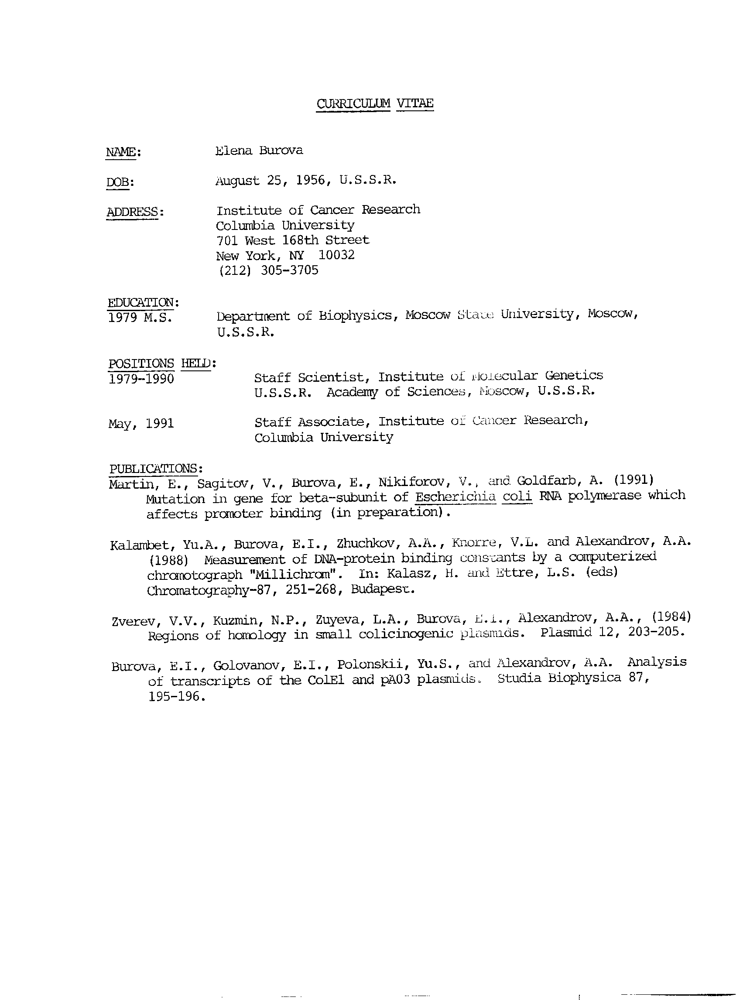

In [4]:
from PIL import Image
# Sample image of a resume
path = "//content/resume_dataset/resume/doc_000051.png"
image = Image.open(path)
image

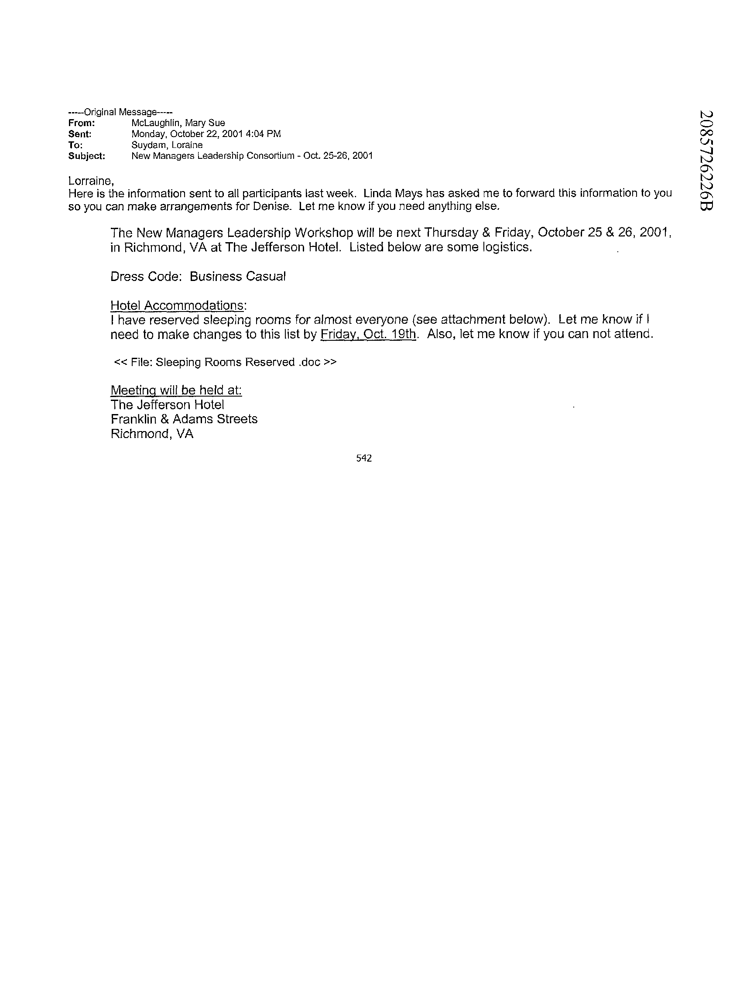

In [5]:
# Sample image of a non_resume
path = "//content/resume_dataset/not_resume/doc_000076.png"
image = Image.open(path)
image

In [6]:
!apt-get update
!apt-get install -y tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [999 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Ge

In [7]:
!pip install pytesseract

In [8]:
import pytesseract
# Sample OCR - getting the text in a image
text = pytesseract.image_to_string(image)
print(text)

 

Mary Sue
‘Sent: Monday, October 2, 2001 4:04 PM

To: Suydam, Loraine

Subject: New Managers Leadership Conserum - Oct, 25-28, 2001
Lorraine,

Here is the information sent to all participants last week. Linda Mays has asked me to forward this information to you
50 you can make arrangements for Denise. Let me know if you need anything else.

The New Managers Leadership Workshop will be next Thursday & Friday, October 25 & 26, 2001,
in Richmond, VA at The Jefferson Hotel. Listed below are some logistics.

Dress Code: Business Casual
Hotel Accommodations:

Thave reserved sleeping rooms for almost everyone (see attachment below). Let me know if |
need to make changes to this list by Friday, Oct. 19th. Also, let me know if you can not atlend.

 

<< File: Sleeping Rooms Reserved .doc >>

Meeting will be held at:
The Jeiferson Hotel
Franklin & Adams Streets
Richmond, VA

a2

AITTITLEBOT



In [9]:
import os

class_labels = {"resume": 1, "not_resume": 0}

text = []
labels = []
path = "/content/resume_dataset"

for label in os.listdir(path):
    label_path = os.path.join(path, label)
    for i in os.listdir(label_path):
        image = Image.open(os.path.join(label_path, i))
        t = pytesseract.image_to_string(image)
        text.append(t)
        labels.append(class_labels[label])

In [10]:
import pandas as pd
# Create a dataframe
data = pd.DataFrame()
data['Text'] = text
data['Labels'] = labels

1.1.  Display the first 5 documents and their labels:

In [11]:
data.head()

,Text,Labels
0,"CONTACT\n\nAddress\n\n123, The Street\nCity\n\...",1
1,\n\n \n \n \n\nCONTACT ME AT\n@ +94 76 ...,1
2,BIOGRAPHICAL SKETCH\n\nGive the folowing infor...,1
3,\n\n4/8/67\n\nBIOGRAPHICAL SKETCH\n\n \n\n \n...,1
4,MELIA\nILLIAMS\n\nA\nWw\n\nEDUCATION\n\nUniver...,1


In [12]:
# Dimension of the dataframe
data.shape

(237, 2)

1.3. Check for missing values and handle them appropriately:

In [13]:
data.isna().any()

,0
Text,False
Labels,False


1.4. Data Exploration

In [14]:
#Target Label Analysis
data['Labels'].value_counts()

,count
Labels,
0,122
1,115


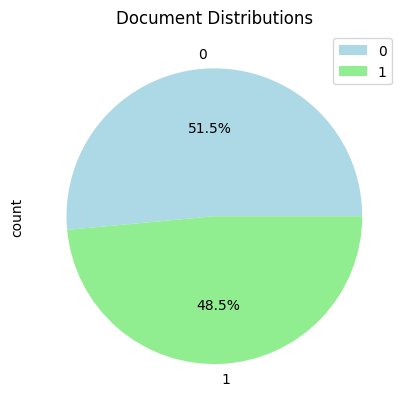

In [15]:
import matplotlib.pyplot as plt
# Pie Chart to view the document distributions
data['Labels'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title("Document Distributions")
plt.legend()
plt.show()

In [16]:
data.to_csv("resume_dataset.csv", index=False)

# 2. Text Preprocessing

2.1. Clean the text data:


In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
# stopwords
stopwords = nltk.corpus.stopwords.words('english')
# punctuations
from string import punctuation

In [19]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def preprocess_data(text):
  text = text.lower()
  text = text.replace("\n"," ").replace("\t"," ")
  text = re.sub("\s+"," ", text)
  text = re.sub(r"\d+", " ", text)
  text = re.sub(r"[^\w\s]", " ", text)
  #text = text.strip()

  # tokens
  tokens = word_tokenize(text)

  # stopwords and punctuation removal
  data = [txt for txt in tokens if txt not in punctuation]
  data = [txt for txt in data if txt not in stopwords]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  data = [lemmatizer.lemmatize(txt) for txt in data]

  return " ".join(data)


In [20]:
preprocessed_data = data.copy()
preprocessed_data['Text'] = preprocessed_data['Text'].apply(preprocess_data)

2.2. Visulaizing the first five rows of the preprocessed data

In [21]:
preprocessed_data.head()

,Text,Labels
0,contact address street city zip country phone ...,1
1,contact oe rusiru itfac mrt ac ik rusiru madur...,1
2,biographical sketch give folowing information ...,1
3,biographical sketch name last first initial ti...,1
4,melia illiams ww education university new york...,1


In [22]:
preprocessed_data.to_csv("preprocessed_resume_dataset.csv", index=False)

In [23]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(preprocessed_data['Text'], preprocessed_data['Labels'], test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (189,)
X_test shape:  (48,)


In [24]:
X_train

,Text
183,date subject te note_for_gitgado ya pfeil mike...
201,contribution tobacco constituent phenol yield ...
230,orginat message uaro bory smtp mbory ammasketi...
95,page aph ket michael e selsted assistant profe...
190,reperfusion pulmonary edema pulmonary artery t...
...,...
106,sol director sol sheny thrombosis research cen...
14,peter danelo shareholder seattle office phone ...
92,gaber planinc lous architect egtronc communica...
179,content type content text himl charseteutf app...


# 3. Feature Extraction

3.1 Convert the text data into numerical features:


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,5), max_df=0.95, min_df=2 ,max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
X_train_tfidf.shape

(189, 3526)

In [27]:
tfidf_vectorizer.get_feature_names_out()

array(['abbreviation used', 'abc corporation', 'ability achieve', ...,
       'zi technical skill microsoft',
       'zi technical skill microsoft office', 'zoology university'],
      dtype=object)

In [28]:
print(X_train_tfidf)

  (0, 2121)	1.0
  (1, 2720)	0.22974835737123658
  (1, 1020)	0.22974835737123658
  (1, 2719)	0.22974835737123658
  (1, 1282)	0.22974835737123658
  (1, 3255)	0.18597876021825965
  (1, 2902)	0.22974835737123658
  (1, 2983)	0.22974835737123658
  (1, 2984)	0.22974835737123658
  (1, 498)	0.22974835737123658
  (1, 2420)	0.2169105179810635
  (1, 2020)	0.45949671474247317
  (1, 539)	0.17602095837016277
  (1, 2160)	0.20695271613296667
  (1, 1876)	0.22974835737123658
  (1, 1019)	0.22974835737123658
  (1, 2718)	0.22974835737123658
  (1, 707)	0.22974835737123658
  (2, 1730)	0.7271301181686942
  (2, 600)	0.6864996658790016
  (3, 89)	0.14906188080099828
  (3, 678)	0.14906188080099828
  (3, 93)	0.14906188080099828
  (3, 1312)	0.14906188080099828
  (3, 88)	0.14906188080099828
  :	:
  (186, 614)	1.0
  (187, 1335)	0.2918682607308353
  (187, 1788)	0.2438341556063967
  (187, 2059)	0.2438341556063967
  (187, 813)	0.4876683112127934
  (187, 1794)	0.2362641365486266
  (187, 1787)	0.22958690651996963
  (187, 3

3.2. Display the feature matrix:

In [29]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 4. Model Building

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [34]:
# LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_tfidf, Y_train)

LogisticRegression()

In [35]:
y_pred1 = model1.predict(X_test_tfidf)
y_pred1

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0])

In [36]:
model2 = RandomForestClassifier()
model2.fit(X_train_tfidf, Y_train)

RandomForestClassifier()

In [37]:
y_pred2 = model2.predict(X_test_tfidf)

# 5. Model Evaluation

In [38]:
#Confusion Matrix for Logistic Regression
confusion_matrix(Y_test, y_pred1)

array([[23,  1],
       [ 1, 23]])

In [40]:
#Classification report for Logistic Regression
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.96      0.96      0.96        24

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



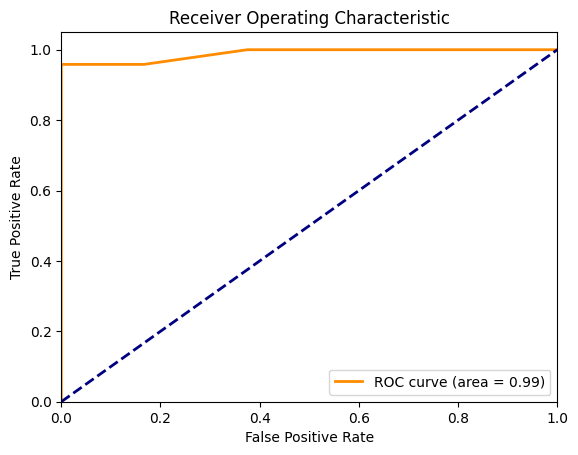

In [43]:
# ROC Curve for Logistic Regression
y_pred_prob = model1.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
#Confusion Matrix for Random Forest
confusion_matrix(Y_test, y_pred2)

array([[24,  0],
       [10, 14]])

In [45]:
#Classification report for Random Forest
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        24
           1       1.00      0.58      0.74        24

    accuracy                           0.79        48
   macro avg       0.85      0.79      0.78        48
weighted avg       0.85      0.79      0.78        48



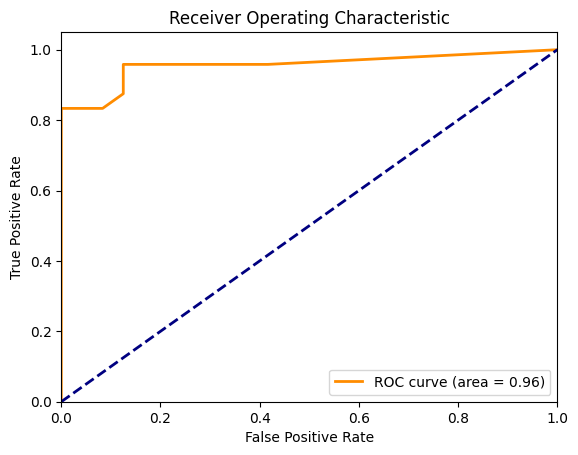

In [49]:
# ROC Curve for Random Forest
y_pred_prob2 = model2.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob2)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()